#MNIST DIGIT CLASSIFICATION

###MNIST:
* The MNIST dataset consists of 60,000 training images and 10,000 test images.




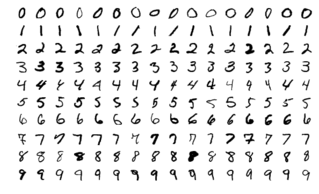

##Our aim is to correctly predict digits from a dataset of 10,000 handwritten digits

###Neural Network for handwritten digit classification

In [1]:
#importing libraries
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [4]:
#loading the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [5]:
train_images.shape    #60,000 images of 28x28 pixel

(60000, 28, 28)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


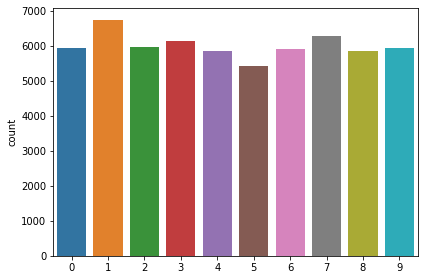

In [9]:
#count of each digit
sns.countplot(train_labels)
plt.tight_layout()

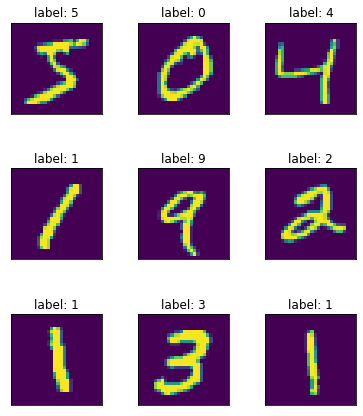

In [10]:
#displaying the first 9 images from training data
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.xticks([])
  plt.yticks([])
  plt.title("label: " + str(train_labels[i]))
  plt.imshow(train_images[i])

plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

In [11]:
#normalizing the data
train_images = train_images/255.0
test_images = test_images/255.0

In [12]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
#building our neural network
model = keras.Sequential([               #will create layers of network in sequence
            keras.layers.Flatten(input_shape=(28,28)),   #flatten is used to convert 28x28 matrix into a simple linear array
            keras.layers.Dense(128, activation=tf.nn.relu),    #Hidden layer (with 128 neurons) with relu as activation function
            keras.layers.Dense(10, activation=tf.nn.softmax)    #Output layer which has 10 neurons to output classification probabilities (10 neurons because we have 10 classes to predict from 0-9)            
])

In [14]:
model.summary()   #inspect the layers of model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    optimizer='adam',    #figures the next guess to optimize the loss
    loss='sparse_categorical_crossentropy',   #loss function: measures how accurate the model is
                                              #computes crossentropy loss between the labels and predictions
    metrics=['accuracy']            #to print the accuracy of each loop while training the model
)

In [16]:
model.fit(train_images, train_labels, epochs=5)  #epochs: 5 training loops

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2654 - accuracy: 0.9250
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1184 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0812 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0472 - accuracy: 0.9854


In [17]:
#prediction
prediction = model.predict(test_images)

In [18]:
predict_labels = [np.argmax(i) for i in prediction]

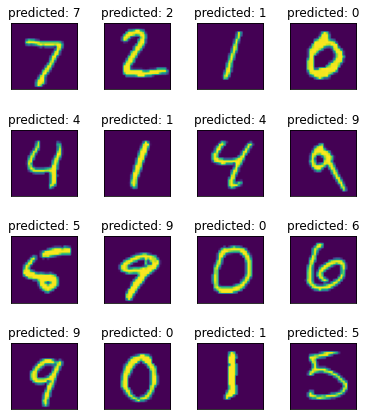

In [19]:
for i in range(16):
  plt.subplot(4, 4, 1+i)
  plt.xticks([])
  plt.yticks([])
  plt.title("predicted: " + str(predict_labels[i]))
  plt.imshow(test_images[i])

plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

Text(69.0, 0.5, 'Original labels')

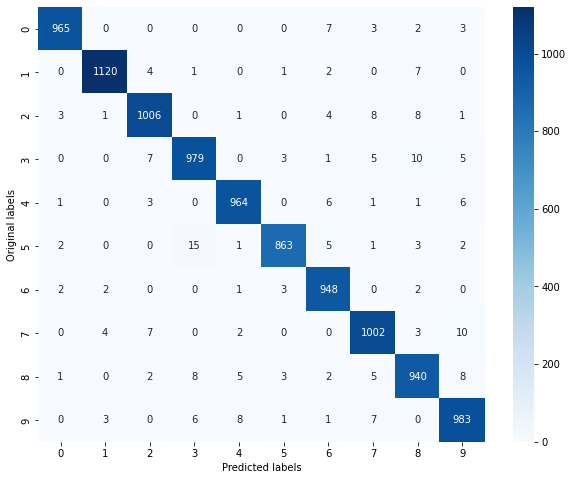

In [20]:
#Confusion matrix
c_matrix = tf.math.confusion_matrix(labels=test_labels, predictions=predict_labels)
plt.figure(figsize=(10,8))
sns.heatmap(c_matrix, annot = True, cmap="Blues", fmt='d');
plt.xlabel('Predicted labels')
plt.ylabel('Original labels')

In [21]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0807 - accuracy: 0.9770
Test Loss: 0.08073371648788452
Test accuracy: 0.9769999980926514


##Is there any other better method?

###Convolutional Neural Network (CNN) for handwritten digit classification:
CNNs are particularly well-suited for a variety of tasks in computer vision.<br>

In [22]:
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1) 

In [23]:
train_images.shape

(60000, 28, 28, 1)

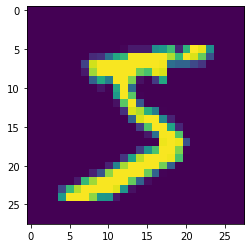

In [24]:
plt.imshow(np.squeeze(train_images[0]))

In [25]:
cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(28,28,1)),   #first convolutional layer
        #convolutional layer: extract features from input image and pass it to the next layer
        tf.keras.layers.MaxPool2D(2,2),   #first max pooling layer
        #pooling: used to reduce the dimensions of the input and feature maps while still preserving spatial invariants
        tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),  #second convolutional layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),   #second max pooling layer

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [26]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn_model.fit(train_images, train_labels, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1263 - accuracy: 0.9608
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0414 - accuracy: 0.9865
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0280 - accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0202 - accuracy: 0.9935
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0152 - accuracy: 0.9950


In [28]:
cnn_prediction = cnn_model.predict(test_images)

In [29]:
cnn_predict_labels = [np.argmax(i) for i in cnn_prediction]

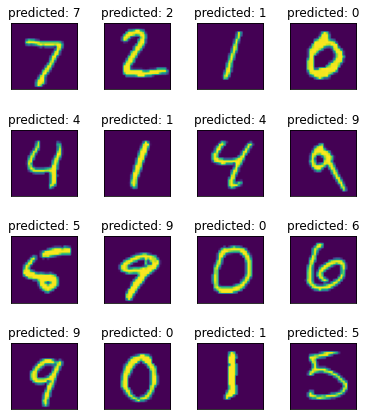

In [30]:
for i in range(16):
  plt.subplot(4, 4, 1+i)
  plt.xticks([])
  plt.yticks([])
  plt.title("predicted: " + str(cnn_predict_labels[i]))
  plt.imshow(np.squeeze(test_images[i]))

plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

Text(69.0, 0.5, 'Original labels')

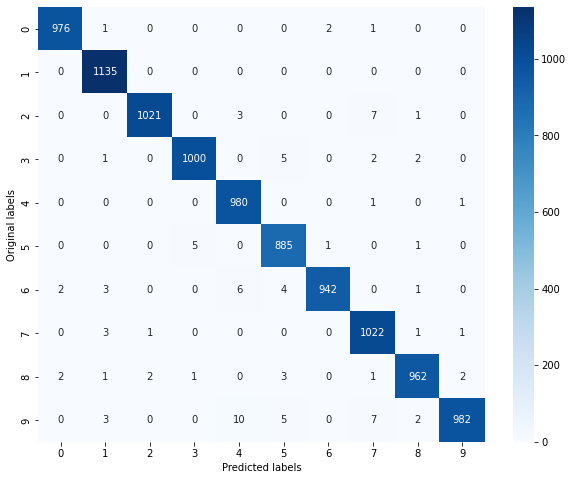

In [31]:
cnn_c_matrix = tf.math.confusion_matrix(labels=test_labels, predictions=cnn_predict_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cnn_c_matrix, annot = True, cmap="Blues", fmt='d');
plt.xlabel('Predicted labels')
plt.ylabel('Original labels')

In [32]:
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(test_images, test_labels)
print('Test loss:', cnn_test_loss)
print('Test accuracy:', cnn_test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.0292 - accuracy: 0.9905
Test loss: 0.02915002778172493
Test accuracy: 0.9904999732971191


###Summary:
In this task, we performed MNIST digit classification using fully connected neural networks and convolutional neural networks(CNN).<br>
While performing the task using a fully commented neural network we saw that the loss was around 0.0807 and accuracy was around 0.976.<br>
But when we used CNN to train our model we found that the loss was around 0.0291 (which is less than a fully connected neural network) and accuracy was around 0.990. <br>
In short, CNN achieved a good accuracy than the fully connected neural networks.

####References:
https://www.analyticsvidhya.com/blog/2021/07/classification-of-handwritten-digits-using-cnn/<br>
https://www.analyticsvidhya.com/blog/2021/04/introduction-to-softmax-for-neural-network/<br>
https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148